In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [2]:
df = pd.read_csv("vaccination_all_tweets.csv")

In [3]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
df.sort_values(by="retweets").tail()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
66822,1384762345314951173,ICMR,New Delhi,We use Twitter as broadcast channel & don't r...,2014-07-31 09:12:45,222337,170,15777,True,2021-04-21 06:54:05,ICMR study shows #COVAXIN neutralises against ...,['COVAXIN'],Twitter Web App,4851,11995,False
54674,1380177947017895938,BharatBiotech,"Hyderabad, India",BharatBiotech - A Multidimensional biotechnolo...,2014-06-27 07:11:25,58137,519,3309,True,2021-04-08 15:17:19,We completely reject the false and malicious r...,NaN,Twitter for Android,6018,15944,False
46053,1377731963101061123,hotvickkrishna,"Manhattan, NY",Actor/Director/Editor/Comedian Create. Laugh....,2020-05-27 01:39:43,5197,78,449,False,2021-04-01 21:17:51,Why we need Two Doses of mRNA Vaccine 💉 #vacci...,"['vaccines', 'COVID19', 'Pfizer', 'moderna', '...",Twitter for iPhone,7695,19622,False
68358,1384529886858170369,Sputnik V,"Moscow, Russia",Sputnik V is the world’s first registered COVI...,2020-08-11 09:12:38,341843,142,1069,True,2021-04-20 15:30:23,"RDIF, Laboratorios Richmond launched productio...",['SputnikV'],Twitter Web App,11288,25724,False
221427,1458798667972984832,Sputnik V,"Moscow, Russia",Sputnik V is the world’s first registered COVI...,2020-08-11 09:12:38,919037,154,3657,True,2021-11-11 14:08:00,This video fits the last almost 2 years into 2...,['SputnikV'],Twitter Web App,12294,54017,False


In [5]:
x = df[df["retweets"]>12000]["text"]
print(x)

221427    This video fits the last almost 2 years into 2...
Name: text, dtype: object


In [6]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
text = "I AM VERY SAD"
sentiment_scores = analyzer.polarity_scores(text)
print(sentiment_scores)


{'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'compound': -0.5256}


In [8]:
df2 = pd.read_csv("India_aggregate.csv")

In [9]:
df2.head()

,Unnamed: 0,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,7743027,2020-01-01,IN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,7743028,2020-01-02,IN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,7743029,2020-01-03,IN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
3,7743030,2020-01-04,IN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
4,7743031,2020-01-05,IN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN


In [10]:
y = df2.groupby("date")["cumulative_confirmed"].sum()

In [11]:
df3 = pd.DataFrame(y.reset_index())
df3["date"] = pd.to_datetime(df3["date"]).dt.date

In [12]:
df["date"]

,date
0,2020-12-20 06:06:44
1,2020-12-13 16:27:13
2,2020-12-12 20:33:45
3,2020-12-12 20:23:59
4,2020-12-12 20:17:19
...,...
228202,2021-11-15 09:00:15
228203,2021-11-15 08:30:26
228204,2021-11-15 08:30:15
228205,2021-11-15 08:03:03


In [13]:
type(df["date"][0])

str

In [14]:
df["date"] =pd.to_datetime(df["date"]).dt.date

In [15]:
df["date"]

,date
0,2020-12-20
1,2020-12-13
2,2020-12-12
3,2020-12-12
4,2020-12-12
...,...
228202,2021-11-15
228203,2021-11-15
228204,2021-11-15
228205,2021-11-15


In [16]:
df4 = df[df["user_location"].str.contains("India", na=False)]


In [17]:
merged = pd.merge(df3,df4,on="date")

In [18]:
merged

,date,cumulative_confirmed,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites,is_retweet
0,2020-12-12,28275864.0,1337815730486702087,WION,India,#WION: World Is One | Welcome to India’s first...,2016-03-21 03:44:54,292510,91,7531,True,The agency also released new information for h...,NaN,TweetDeck,0,18,False
1,2020-12-12,28275864.0,1337773751841144833,BOOM Live,"Mumbai, India",IFCN certified fact-driven journalism. India's...,2014-03-16 03:52:50,64185,1183,1794,True,The US Food and Drug Administration (FDA) has ...,NaN,Twitter Web App,1,5,False
2,2020-12-12,28275864.0,1337887453726826497,DD News,"New Delhi, India","Official Twitter account of DD News, the Publi...",2013-01-18 13:04:45,3085027,78,1578,True,#UnitedStates : The Federal Aviation Administr...,['UnitedStates'],TweetDeck,4,21,False
3,2020-12-12,28275864.0,1337872353536176131,DD India,"New Delhi, India","Official account of DD India, English News TV ...",2016-04-08 09:24:41,36594,530,7160,True,#UnitedStates : The Federal Aviation Administr...,['UnitedStates'],TweetDeck,0,5,False
4,2020-12-13,28349353.0,1338027516536135680,Outlook Magazine,"New Delhi, India",The fully loaded news magazine from India,2009-03-04 12:45:00,228029,62,232,True,With numbers likely to get worse over the holi...,['vaccine'],Twitter Web App,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44333,2021-11-23,97198059.0,1462971770412040197,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False
44334,2021-11-23,97198059.0,1462971726350880768,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
44335,2021-11-23,97198059.0,1462964202511867908,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
44336,2021-11-23,97198059.0,1462956669881630722,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False


In [19]:
plt.plot(merged["cumulative_confirmed"],analyzer.polarity_scores(merged["text"])["neg"])

KeyboardInterrupt: 

In [20]:
z = merged[:]

In [21]:
merged.shape

(44338, 17)

In [22]:
z = z.copy()
z["negative"] = z["text"].apply(lambda x: analyzer.polarity_scores(x)["neg"])


In [23]:
z["positive"] = z["text"].apply(lambda x: analyzer.polarity_scores(x)["pos"])

In [24]:
z["compound"] = z["text"].apply(lambda x: analyzer.polarity_scores(x)["compound"])

In [25]:
z["negative"]

,negative
0,0.000
1,0.140
2,0.000
3,0.000
4,0.195
...,...
44333,0.000
44334,0.000
44335,0.000
44336,0.000


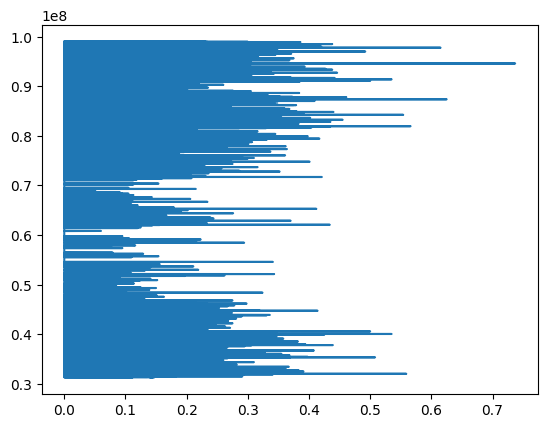

In [26]:
z["cumulative_confirmed_smooth"] = z["cumulative_confirmed"].rolling(window=1000).mean()  # Adjust window size
plt.plot(z["negative"], z["cumulative_confirmed_smooth"])

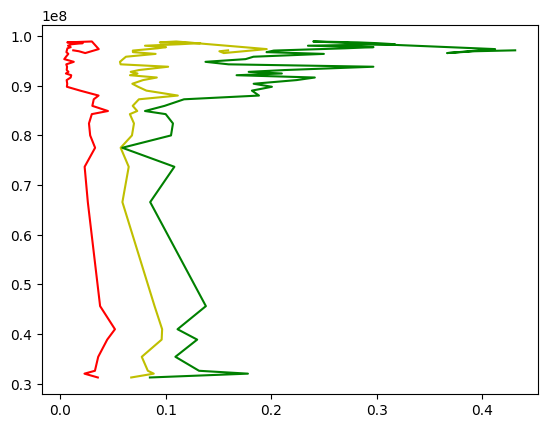

In [27]:
z['interval'] = (z.index // 1000) # Aggregate every 1000 rows
z_agg = z.groupby('interval')[["negative","cumulative_confirmed","positive","compound"]].mean()
plt.plot(z_agg["negative"], z_agg["cumulative_confirmed"],color="r")
plt.plot(z_agg["positive"], z_agg["cumulative_confirmed"],color="y")
plt.plot(z_agg["compound"], z_agg["cumulative_confirmed"],color="g")

<Axes: xlabel='negative', ylabel='Density'>

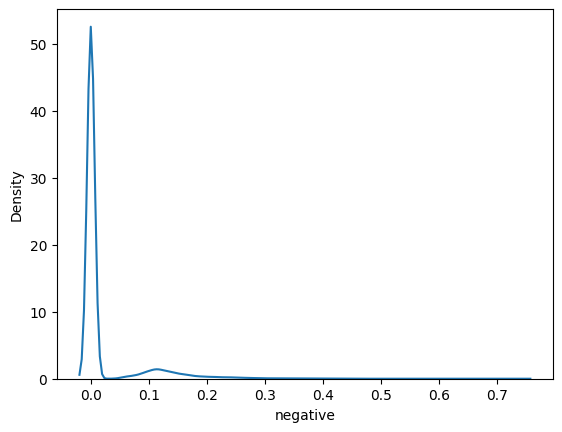

In [28]:
sns.kdeplot(z["negative"])

<Axes: xlabel='positive', ylabel='Density'>

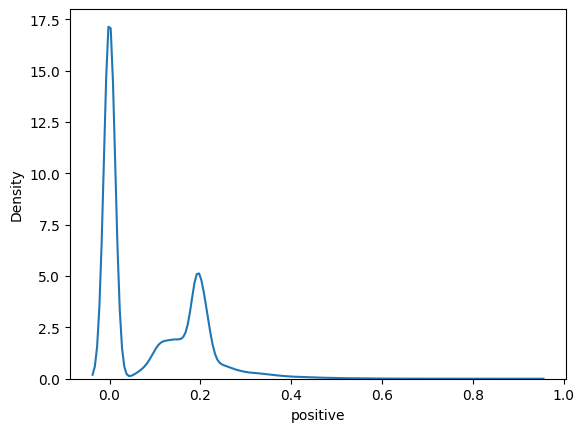

In [29]:
sns.kdeplot(z["positive"])

<Axes: xlabel='compound', ylabel='Density'>

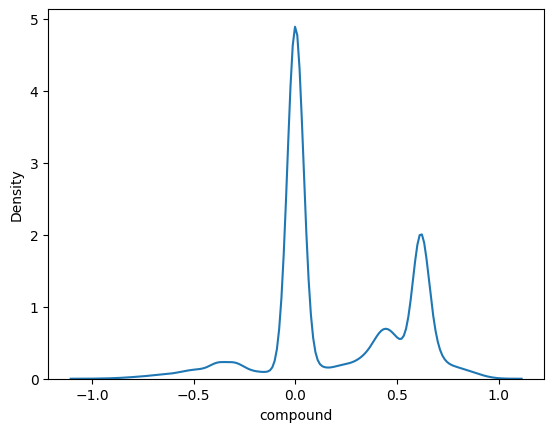

In [30]:
sns.kdeplot(z["compound"])

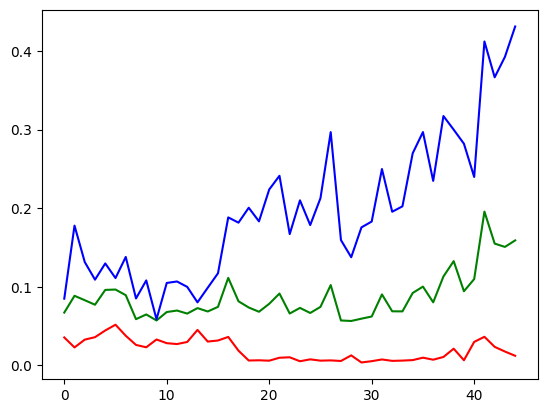

In [31]:
plt.plot(z_agg.index ,z_agg["negative"],color="r")
plt.plot(z_agg.index ,z_agg["positive"],color="g")
plt.plot(z_agg.index ,z_agg["compound"],color='b')

In [32]:
z_agg.index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44],
      dtype='int64', name='interval')

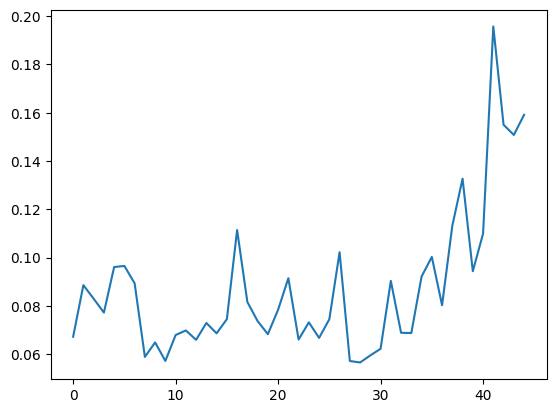

In [33]:
plt.plot(z_agg.index ,z_agg["positive"])

In [ ]:
# 1. no of tweets datewise peak
# 2.find unigrarms , bigrams ,trigrams repeating
#3. analysis about specific covid vaccine timeseries

In [34]:
df["text"] = df["text"].str.lower()

In [35]:
df["text"]

,text
0,same folks said daikon paste could treat a cyt...
1,while the world has been on the wrong side of ...
2,#coronavirus #sputnikv #astrazeneca #pfizerbio...
3,"facts are immutable, senator, even when you're..."
4,explain to me again why we need a vaccine @bor...
...,...
228202,45+ #urban #bengaluru #covidvaccine availabili...
228203,18-44 #bbmp #bengaluru #covidvaccine availabil...
228204,18-44 #urban #bengaluru #covidvaccine availabi...
228205,they promote their vaccines leaving out the st...


In [36]:
df["text"]= df["text"].str.replace(r"http\S+","",regex=True)
df["text"] =  df["text"].str.replace(r"@\w+","",regex=True)
df["text"]  = df["text"].str.replace(r"\s{2,}", " ", regex=True)

In [37]:
df["text"]

,text
0,same folks said daikon paste could treat a cyt...
1,while the world has been on the wrong side of ...
2,#coronavirus #sputnikv #astrazeneca #pfizerbio...
3,"facts are immutable, senator, even when you're..."
4,explain to me again why we need a vaccine #whe...
...,...
228202,45+ #urban #bengaluru #covidvaccine availabili...
228203,18-44 #bbmp #bengaluru #covidvaccine availabil...
228204,18-44 #urban #bengaluru #covidvaccine availabi...
228205,they promote their vaccines leaving out the st...


In [38]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from sklearn.feature_extraction.text import CountVectorizer


<ipython-input-40-3dd3d0cede67>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=unigram_df['text'][::-1], x=unigram_df['count'][::-1], palette='Blues_d')
<ipython-input-40-3dd3d0cede67>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=bigram_df['text'][::-1], x=bigram_df['count'][::-1], palette='Blues_d')
<ipython-input-40-3dd3d0cede67>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=trigram_df['text'][::-1], x=trigram_df['count'][::-1], palette='Blues_d')


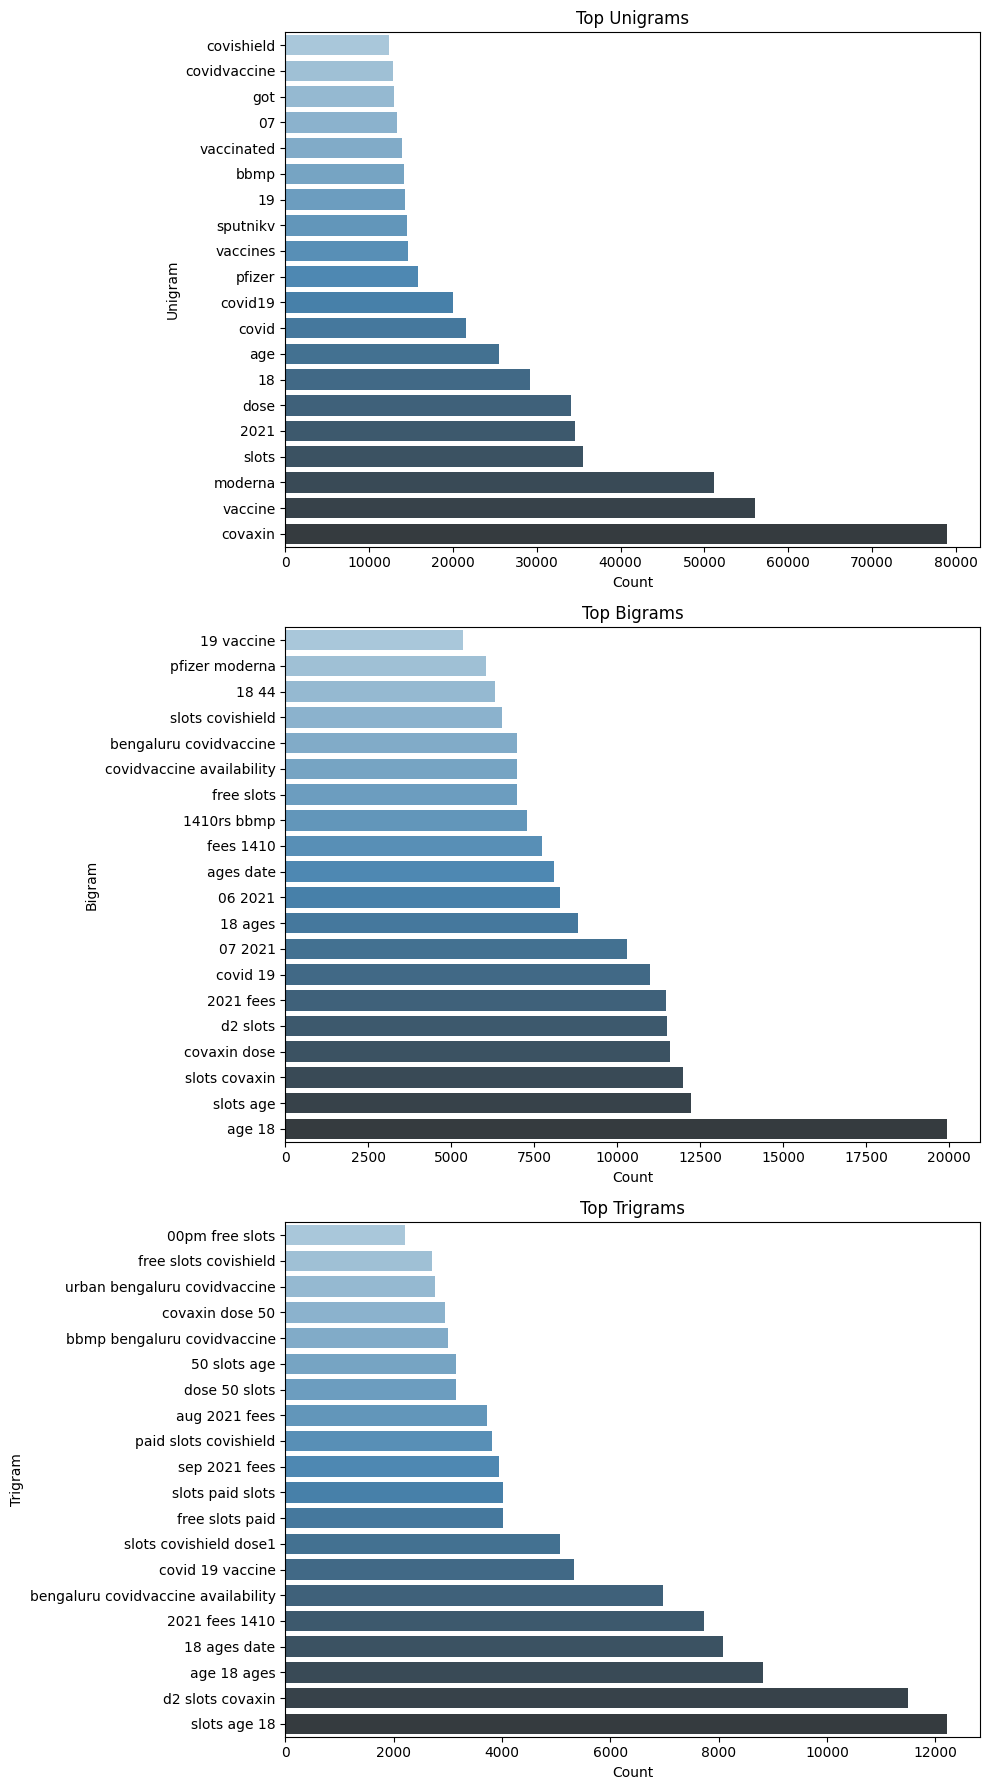

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Define the ngram_df function
def ngram_df(corpus, nrange, n=None):
    vec = CountVectorizer(stop_words='english', ngram_range=nrange).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    total_list = words_freq[:n]
    x = pd.DataFrame(total_list, columns=['text', 'count'])
    return x

# Generate n-gram DataFrames
unigram_df = ngram_df(df['text'], (1, 1), 20)
bigram_df = ngram_df(df['text'], (2, 2), 20)
trigram_df = ngram_df(df['text'], (3, 3), 20)

# Set up the matplotlib figure
plt.figure(figsize=(10, 18))

# Plot Unigrams
plt.subplot(3, 1, 1)
sns.barplot(y=unigram_df['text'][::-1], x=unigram_df['count'][::-1], palette='Blues_d')
plt.title('Top Unigrams')
plt.xlabel('Count')
plt.ylabel('Unigram')

# Plot Bigrams
plt.subplot(3, 1, 2)
sns.barplot(y=bigram_df['text'][::-1], x=bigram_df['count'][::-1], palette='Blues_d')
plt.title('Top Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')

# Plot Trigrams
plt.subplot(3, 1, 3)
sns.barplot(y=trigram_df['text'][::-1], x=trigram_df['count'][::-1], palette='Blues_d')
plt.title('Top Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

<ipython-input-41-ed49749b74c4>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=unigram_df['text'][::-1], x=unigram_df['count'][::-1], palette='Blues_d')
<ipython-input-41-ed49749b74c4>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=bigram_df['text'][::-1], x=bigram_df['count'][::-1], palette='Blues_d')
<ipython-input-41-ed49749b74c4>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=trigram_df['text'][::-1], x=trigram_df['count'][::-1], palette='Blues_d')


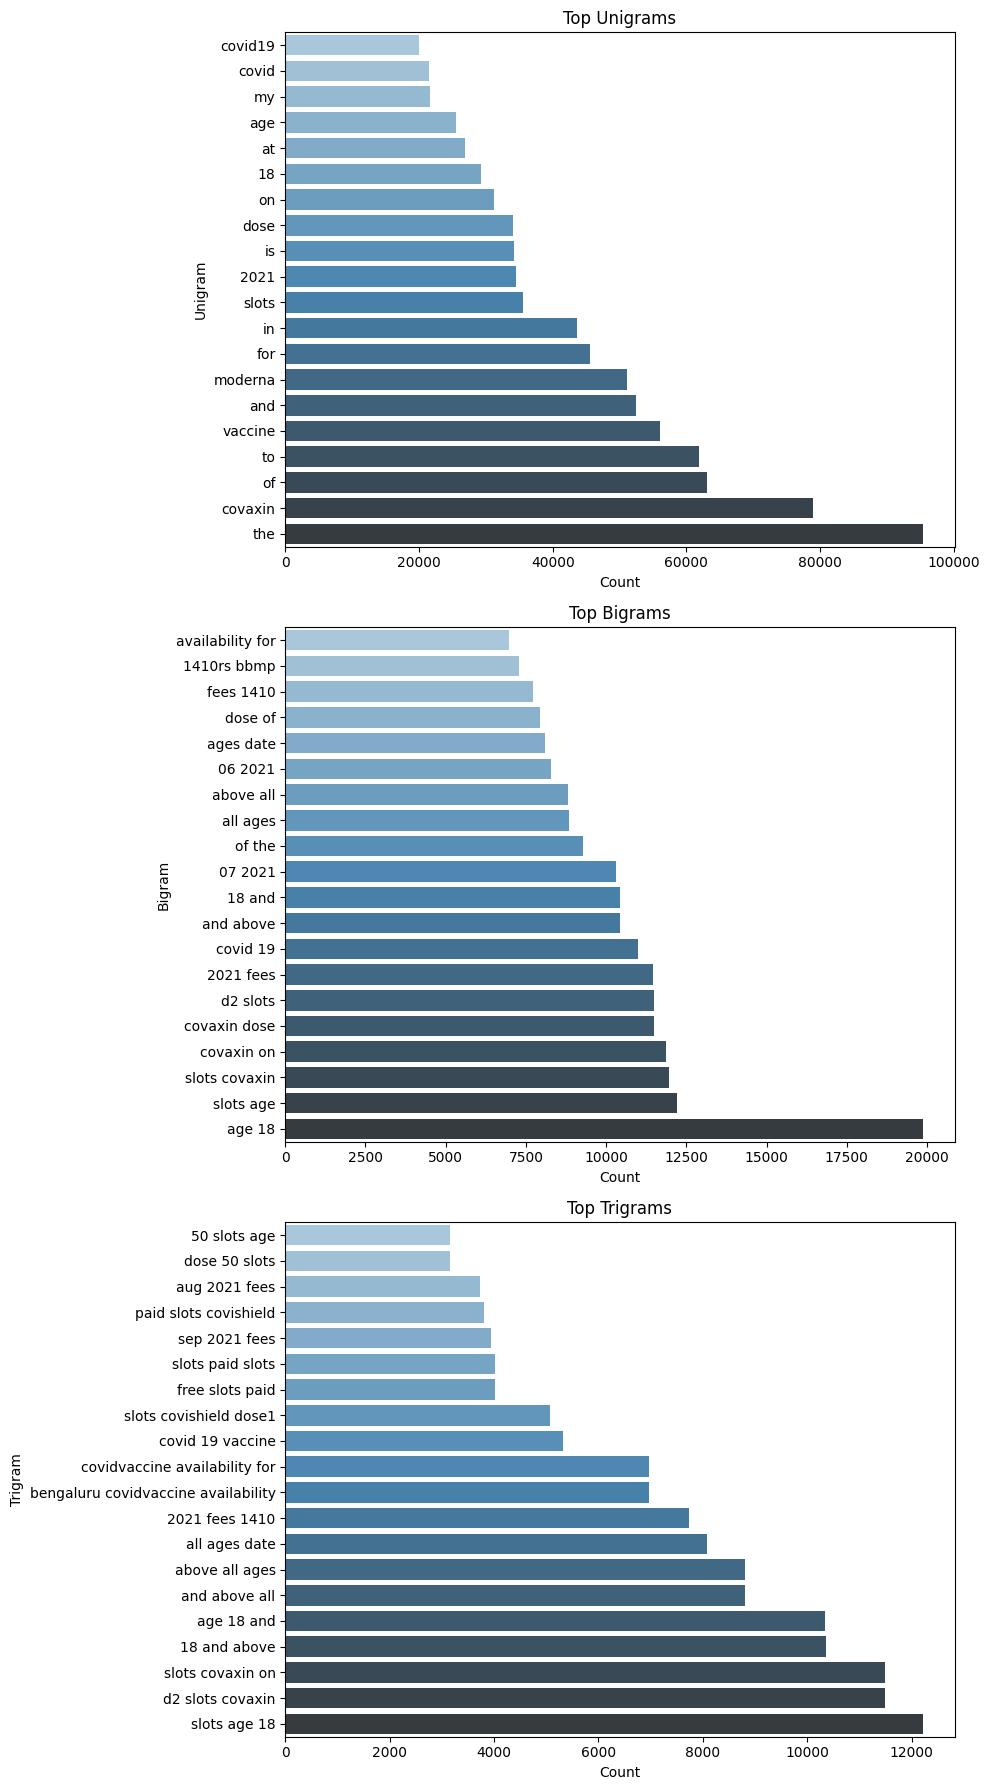

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Define the ngram_df function without removing stopwords
def ngram_df(corpus, nrange, n=None):
    # Set stop_words to None to include all words
    vec = CountVectorizer(stop_words=None, ngram_range=nrange).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    total_list = words_freq[:n]
    x = pd.DataFrame(total_list, columns=['text', 'count'])
    return x

# Generate n-gram DataFrames
unigram_df = ngram_df(df['text'], (1, 1), 20)
bigram_df = ngram_df(df['text'], (2, 2), 20)
trigram_df = ngram_df(df['text'], (3, 3), 20)

# Set up the matplotlib figure
plt.figure(figsize=(10, 18))

# Plot Unigrams
plt.subplot(3, 1, 1)
sns.barplot(y=unigram_df['text'][::-1], x=unigram_df['count'][::-1], palette='Blues_d')
plt.title('Top Unigrams')
plt.xlabel('Count')
plt.ylabel('Unigram')

# Plot Bigrams
plt.subplot(3, 1, 2)
sns.barplot(y=bigram_df['text'][::-1], x=bigram_df['count'][::-1], palette='Blues_d')
plt.title('Top Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')

# Plot Trigrams
plt.subplot(3, 1, 3)
sns.barplot(y=trigram_df['text'][::-1], x=trigram_df['count'][::-1], palette='Blues_d')
plt.title('Top Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')

# Adjust layout
plt.tight_layout()
plt.show()


In [42]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [43]:
type(df["date"][0])

datetime.date

In [44]:
z = df["date"].value_counts()

In [45]:
type(z)

pandas.core.series.Series

In [46]:
dfdate = pd.DataFrame(z.index ,z.values)

In [47]:
dfdate

,date
2911,2021-03-01
2626,2021-06-29
2482,2021-07-19
2423,2021-04-21
2414,2021-06-30
...,...
40,2020-12-25
39,2021-02-06
37,2021-02-03
31,2021-02-01


In [48]:
# prompt: i want dfdate with columns , z.index , z.values , and index of dfdate should not be same as z.index

dfdate = pd.DataFrame({'z.index': z.index, 'z.values': z.values})
dfdate.index = range(1, len(dfdate) + 1)  # Set a new index different from z.index
dfdate.sort_values

<bound method DataFrame.sort_values of         z.index  z.values
1    2021-03-01      2911
2    2021-06-29      2626
3    2021-07-19      2482
4    2021-04-21      2423
5    2021-06-30      2414
..          ...       ...
315  2020-12-25        40
316  2021-02-06        39
317  2021-02-03        37
318  2021-02-01        31
319  2021-01-31        30

[319 rows x 2 columns]>

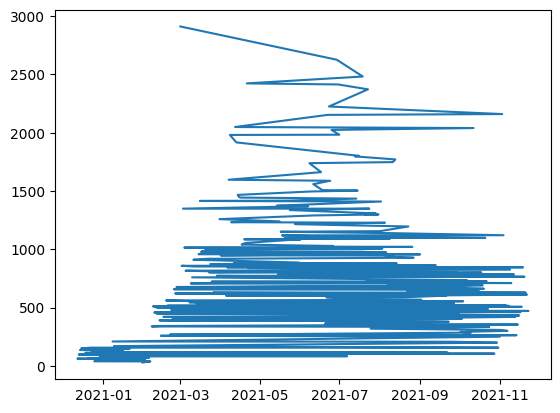

In [49]:
plt.plot(dfdate["z.index"],dfdate["z.values"])

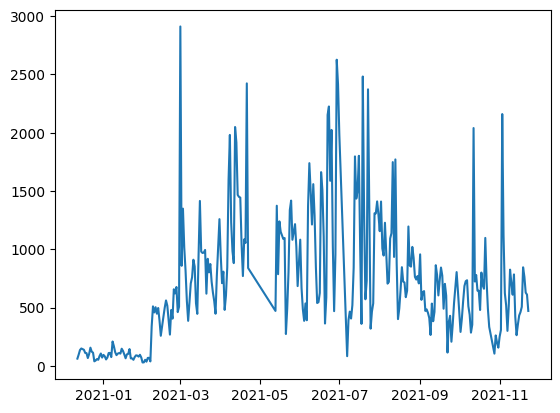

In [50]:
dfdate.sort_values(by="z.index",inplace=True)
plt.plot(dfdate["z.index"],dfdate["z.values"])

In [58]:
import pandas as pd
from scipy.signal import find_peaks

# Assuming 'dfdate' is your DataFrame and 'z.index' is the date column, 'z.values' is the tweet count column.
# Make sure dates are in datetime format
dfdate['z.index'] = pd.to_datetime(dfdate['z.index'])
dfdate.sort_values(by="z.index", inplace=True)

# Find peaks with a height threshold to filter out minor peaks
peaks, _ = find_peaks(dfdate["z.values"], height=750)  # Adjust 'height' as needed

# Extract peak dates and tweet counts
peak_dates = dfdate["z.index"].iloc[peaks]
peak_values = dfdate["z.values"].iloc[peaks]

# Display the peak dates and tweet counts
peak_info = pd.DataFrame({"Date": peak_dates, "Tweet Count": peak_values})
print(peak_info)


          Date  Tweet Count
1   2021-03-01         2911
38  2021-03-03         1349
90  2021-03-11          911
33  2021-03-16         1415
76  2021-03-20          995
89  2021-03-22          919
94  2021-03-24          874
46  2021-03-31         1259
109 2021-04-03          809
14  2021-04-08         1981
10  2021-04-12         2049
64  2021-04-19         1086
4   2021-04-21         2423
36  2021-05-14         1374
47  2021-05-16         1240
61  2021-05-20         1097
32  2021-05-25         1418
50  2021-05-28         1216
65  2021-06-01         1083
20  2021-06-08         1739
24  2021-06-11         1559
21  2021-06-17         1662
7   2021-06-23         2225
12  2021-06-25         2024
2   2021-06-29         2626
17  2021-07-13         1797
16  2021-07-16         1802
3   2021-07-19         2482
6   2021-07-23         2372
41  2021-07-28         1309
34  2021-07-30         1411
35  2021-08-02         1410
49  2021-08-05         1228
19  2021-08-11         1748
18  2021-08-13      

In [55]:
dfdate["z.values"].mean()

715.3824451410659

In [59]:
peak_info["Date"] = pd.to_datetime(peak_info["Date"]).dt.date

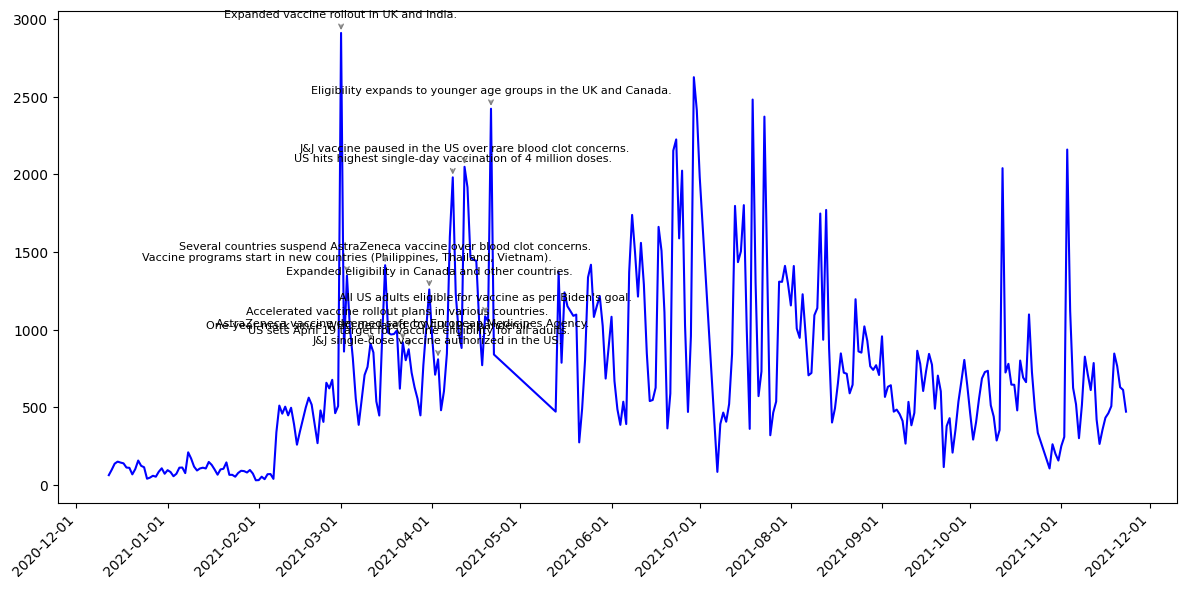

In [75]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

events = {
    "2021-03-01": "Expanded vaccine rollout in UK and India.",
    "2021-03-03": "Vaccine programs start in new countries (Philippines, Thailand, Vietnam).",
    "2021-03-11": "One-year mark since WHO declared COVID-19 a pandemic.",
    "2021-03-16": "Several countries suspend AstraZeneca vaccine over blood clot concerns.",
    "2021-03-20": "Accelerated vaccine rollout plans in various countries.",
    "2021-03-22": "AstraZeneca vaccine deemed safe by European Medicines Agency.",
    "2021-03-24": "US sets April 19 target for vaccine eligibility for all adults.",
    "2021-03-31": "Expanded eligibility in Canada and other countries.",
    "2021-04-03": "J&J single-dose vaccine authorized in the US.",
    "2021-04-08": "US hits highest single-day vaccination of 4 million doses.",
    "2021-04-12": "J&J vaccine paused in the US over rare blood clot concerns.",
    "2021-04-19": "All US adults eligible for vaccine as per Biden's goal.",
    "2021-04-21": "Eligibility expands to younger age groups in the UK and Canada."
}
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(dfdate["z.index"], dfdate["z.values"], label="Tweet Counts", color='b')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
for date, description in events.items():
    x = pd.to_datetime(date)
    y = dfdate.loc[dfdate["z.index"] == x, "z.values"].values[0] if x in dfdate["z.index"].values else None
    if y:
        ax.annotate(description, xy=(x, y), xytext=(x, y + 100),
                    fontsize=8, ha='center', arrowprops=dict(arrowstyle="->", color='gray'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


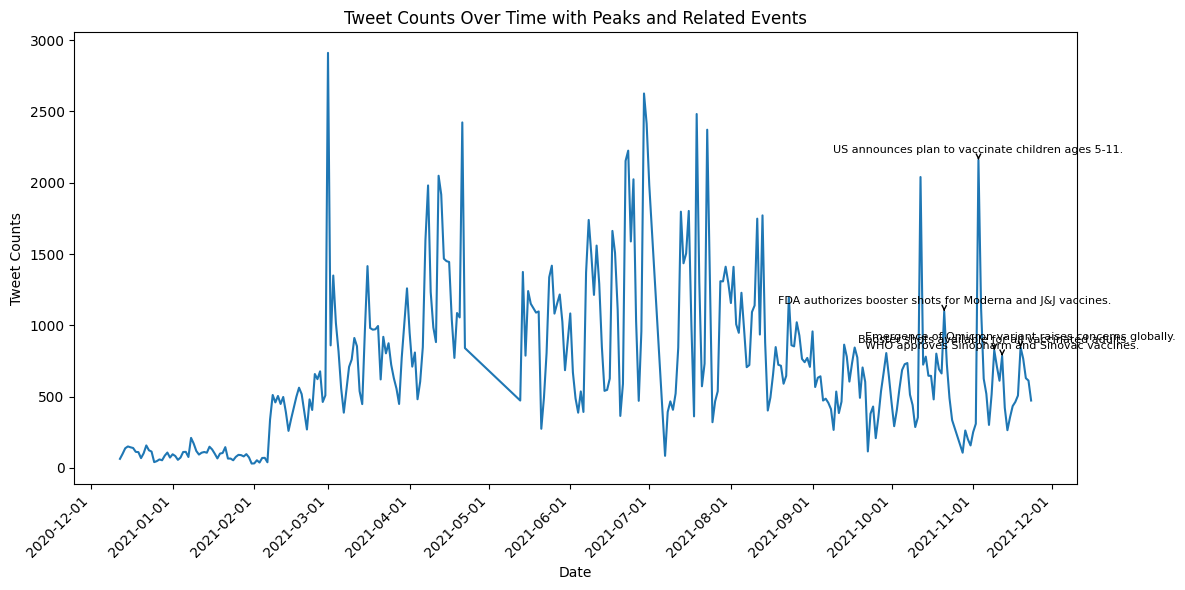

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dfdate["z.index"], dfdate["z.values"])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
summarized_events = {
    "2021-10-21": "FDA authorizes booster shots for Moderna and J&J vaccines.",
    "2021-11-03": "US announces plan to vaccinate children ages 5-11.",
    "2021-11-09": "Booster shots available for all vaccinated adults.",
    "2021-11-12": "WHO approves Sinopharm and Sinovac vaccines.",
    "2021-11-19": "Emergence of Omicron variant raises concerns globally."
}
for date, event in summarized_events.items():
    ax.annotate(event,
                xy=(pd.to_datetime(date), dfdate[dfdate["z.index"] == pd.to_datetime(date)]["z.values"].values[0]),
                xytext=(pd.to_datetime(date), dfdate[dfdate["z.index"] == pd.to_datetime(date)]["z.values"].values[0] + 50),
                fontsize=8, ha='center', color='black', arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel("Date")
ax.set_ylabel("Tweet Counts")
ax.set_title("Tweet Counts Over Time with Peaks and Related Events")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


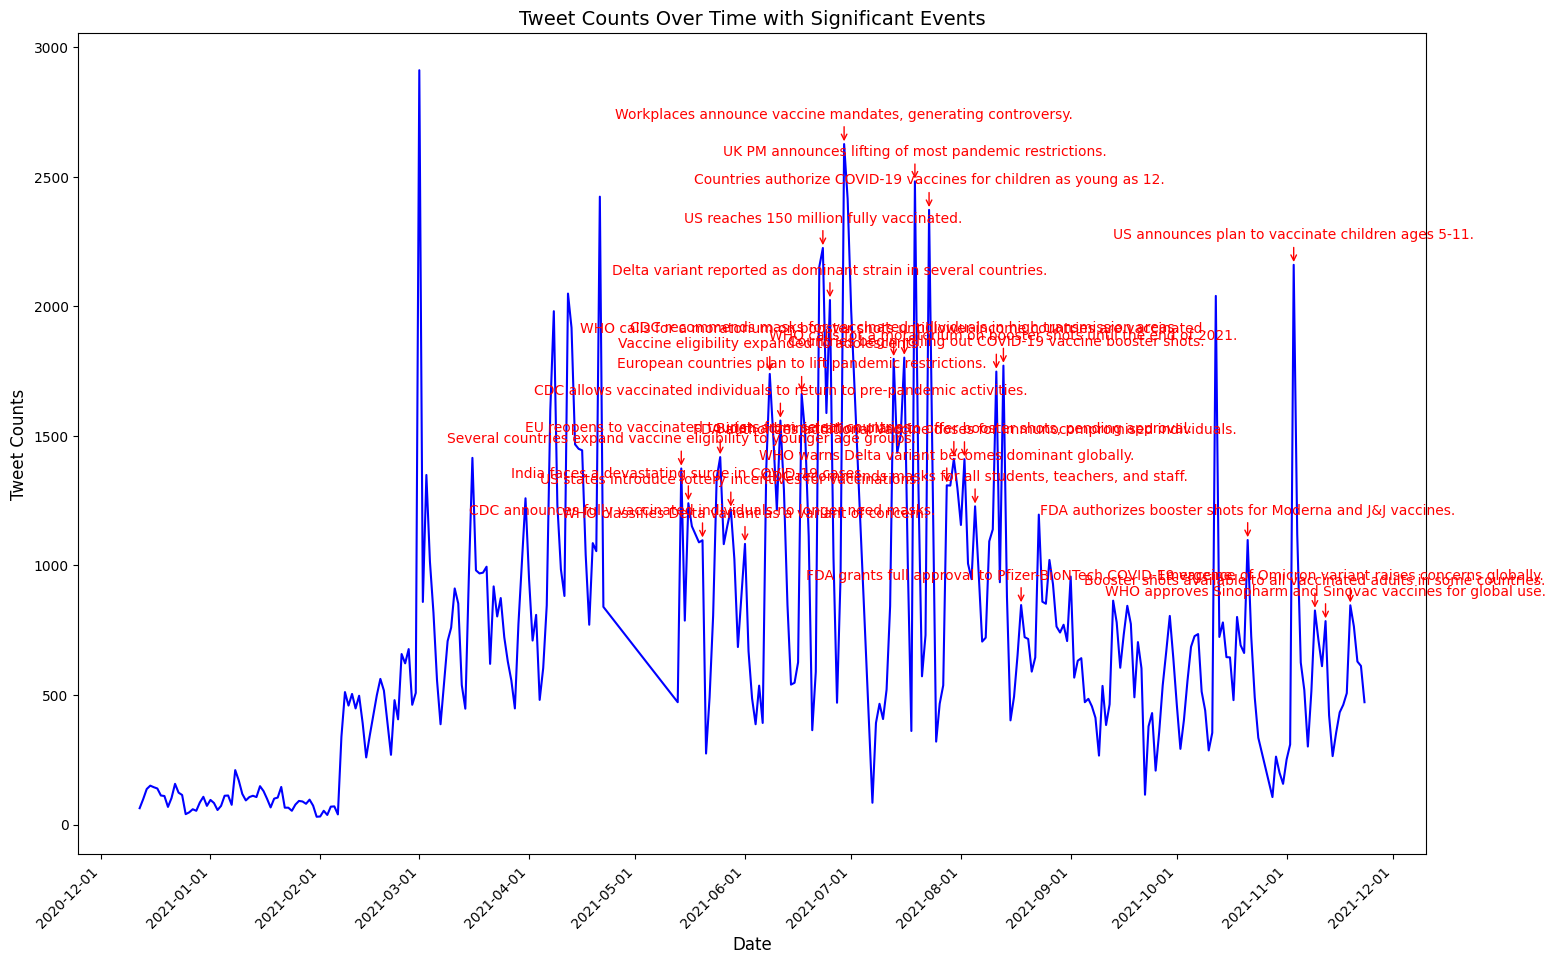

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Create a figure and axis with a larger size
fig, ax = plt.subplots(figsize=(16, 10))  # Increase figure size for better visibility

# Plot the tweet counts over time
ax.plot(dfdate["z.index"], dfdate["z.values"], label='Tweet Counts', color='blue')

# Format x-axis to display dates nicely
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Adjust the locator for desired frequency

# Define the full events dictionary with all significant dates and their events
all_events = {
    "2021-05-14": "Several countries expand vaccine eligibility to younger age groups.",
    "2021-05-16": "India faces a devastating surge in COVID-19 cases.",
    "2021-05-20": "CDC announces fully vaccinated individuals no longer need masks.",
    "2021-05-25": "EU reopens to vaccinated tourists from select countries.",
    "2021-05-28": "US states introduce lottery incentives for vaccinations.",
    "2021-06-01": "WHO classifies Delta variant as a variant of concern.",
    "2021-06-08": "Vaccine eligibility expanded to adolescents.",
    "2021-06-11": "CDC allows vaccinated individuals to return to pre-pandemic activities.",
    "2021-06-17": "European countries plan to lift pandemic restrictions.",
    "2021-06-23": "US reaches 150 million fully vaccinated.",
    "2021-06-25": "Delta variant reported as dominant strain in several countries.",
    "2021-06-29": "Workplaces announce vaccine mandates, generating controversy.",
    "2021-07-13": "WHO calls for a moratorium on booster shots until lower-income countries are vaccinated.",
    "2021-07-16": "CDC recommends masks for vaccinated individuals in high transmission areas.",
    "2021-07-19": "UK PM announces lifting of most pandemic restrictions.",
    "2021-07-23": "Countries authorize COVID-19 vaccines for children as young as 12.",
    "2021-07-28": "WHO warns Delta variant becomes dominant globally.",
    "2021-07-30": "Biden administration plans to offer booster shots, pending approval.",
    "2021-08-02": "FDA authorizes additional vaccine doses for immunocompromised individuals.",
    "2021-08-05": "CDC recommends masks for all students, teachers, and staff.",
    "2021-08-11": "Countries begin rolling out COVID-19 vaccine booster shots.",
    "2021-08-13": "WHO calls for a moratorium on booster shots until the end of 2021.",
    "2021-08-18": "FDA grants full approval to Pfizer-BioNTech COVID-19 vaccine.",
    "2021-10-21": "FDA authorizes booster shots for Moderna and J&J vaccines.",
    "2021-11-03": "US announces plan to vaccinate children ages 5-11.",
    "2021-11-09": "Booster shots available to all vaccinated adults in some countries.",
    "2021-11-12": "WHO approves Sinopharm and Sinovac vaccines for global use.",
    "2021-11-19": "Emergence of Omicron variant raises concerns globally."
}

# Add annotations for all events
for date, event in all_events.items():
    # Get the y-value for the current date for the annotation
    y_value = dfdate[dfdate["z.index"] == pd.to_datetime(date)]["z.values"].values[0]
    ax.annotate(event,
                xy=(pd.to_datetime(date), y_value),
                xytext=(pd.to_datetime(date), y_value + 100),  # Adjust height for better visibility
                fontsize=10, ha='center', color='red', arrowprops=dict(arrowstyle='->', color='red'))

# Add labels and title
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Tweet Counts", fontsize=12)
ax.set_title("Tweet Counts Over Time with Significant Events", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout to provide more space for annotations
plt.tight_layout(pad=2.0)

# Display the plot
plt.show()


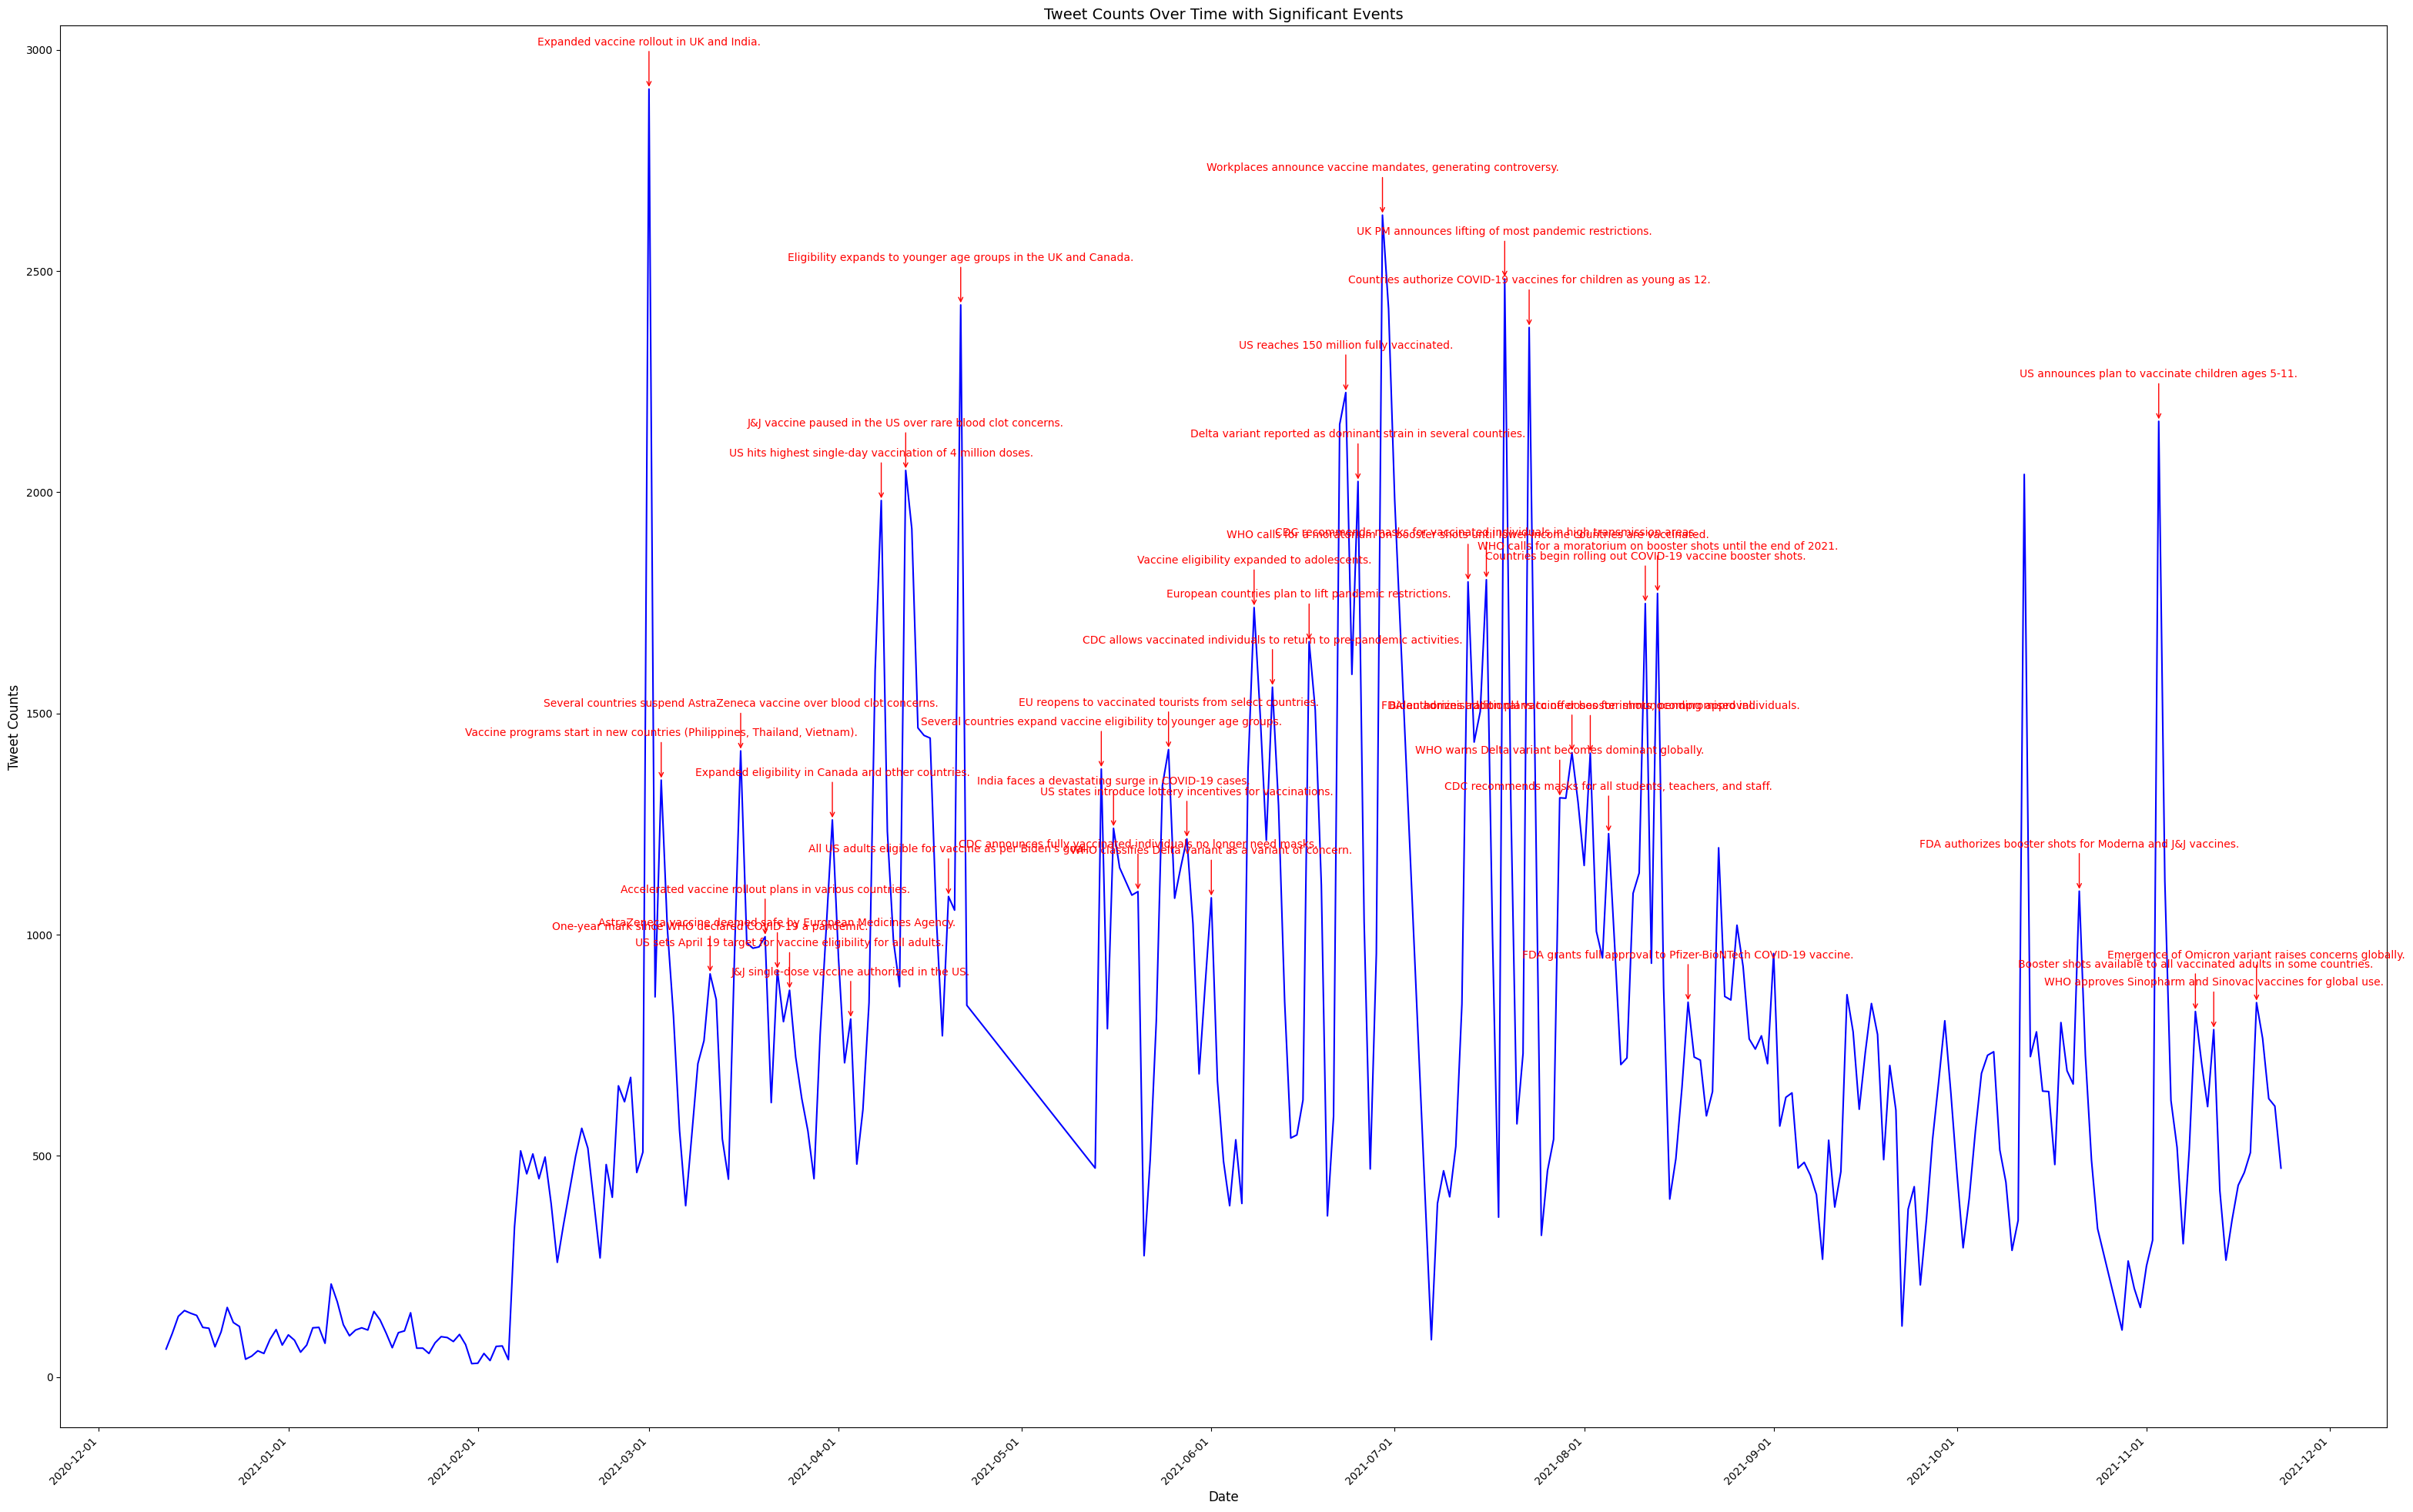

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

dfdate["z.index"] = pd.to_datetime(dfdate["z.index"])

# Create a figure and axis with a larger size
fig, ax = plt.subplots(figsize=(32, 20))  # Increase figure size for better visibility

# Plot the tweet counts over time
ax.plot(dfdate["z.index"], dfdate["z.values"], label='Tweet Counts', color='blue')

# Format x-axis to display dates nicely
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Adjust the locator for desired frequency

# Define the full events dictionary with all significant dates and their events
all_events = {
    "2021-03-01": "Expanded vaccine rollout in UK and India.",
    "2021-03-03": "Vaccine programs start in new countries (Philippines, Thailand, Vietnam).",
    "2021-03-11": "One-year mark since WHO declared COVID-19 a pandemic.",
    "2021-03-16": "Several countries suspend AstraZeneca vaccine over blood clot concerns.",
    "2021-03-20": "Accelerated vaccine rollout plans in various countries.",
    "2021-03-22": "AstraZeneca vaccine deemed safe by European Medicines Agency.",
    "2021-03-24": "US sets April 19 target for vaccine eligibility for all adults.",
    "2021-03-31": "Expanded eligibility in Canada and other countries.",
    "2021-04-03": "J&J single-dose vaccine authorized in the US.",
    "2021-04-08": "US hits highest single-day vaccination of 4 million doses.",
    "2021-04-12": "J&J vaccine paused in the US over rare blood clot concerns.",
    "2021-04-19": "All US adults eligible for vaccine as per Biden's goal.",
    "2021-04-21": "Eligibility expands to younger age groups in the UK and Canada.",
    "2021-05-14": "Several countries expand vaccine eligibility to younger age groups.",
    "2021-05-16": "India faces a devastating surge in COVID-19 cases.",
    "2021-05-20": "CDC announces fully vaccinated individuals no longer need masks.",
    "2021-05-25": "EU reopens to vaccinated tourists from select countries.",
    "2021-05-28": "US states introduce lottery incentives for vaccinations.",
    "2021-06-01": "WHO classifies Delta variant as a variant of concern.",
    "2021-06-08": "Vaccine eligibility expanded to adolescents.",
    "2021-06-11": "CDC allows vaccinated individuals to return to pre-pandemic activities.",
    "2021-06-17": "European countries plan to lift pandemic restrictions.",
    "2021-06-23": "US reaches 150 million fully vaccinated.",
    "2021-06-25": "Delta variant reported as dominant strain in several countries.",
    "2021-06-29": "Workplaces announce vaccine mandates, generating controversy.",
    "2021-07-13": "WHO calls for a moratorium on booster shots until lower-income countries are vaccinated.",
    "2021-07-16": "CDC recommends masks for vaccinated individuals in high transmission areas.",
    "2021-07-19": "UK PM announces lifting of most pandemic restrictions.",
    "2021-07-23": "Countries authorize COVID-19 vaccines for children as young as 12.",
    "2021-07-28": "WHO warns Delta variant becomes dominant globally.",
    "2021-07-30": "Biden administration plans to offer booster shots, pending approval.",
    "2021-08-02": "FDA authorizes additional vaccine doses for immunocompromised individuals.",
    "2021-08-05": "CDC recommends masks for all students, teachers, and staff.",
    "2021-08-11": "Countries begin rolling out COVID-19 vaccine booster shots.",
    "2021-08-13": "WHO calls for a moratorium on booster shots until the end of 2021.",
    "2021-08-18": "FDA grants full approval to Pfizer-BioNTech COVID-19 vaccine.",
    "2021-10-21": "FDA authorizes booster shots for Moderna and J&J vaccines.",
    "2021-11-03": "US announces plan to vaccinate children ages 5-11.",
    "2021-11-09": "Booster shots available to all vaccinated adults in some countries.",
    "2021-11-12": "WHO approves Sinopharm and Sinovac vaccines for global use.",
    "2021-11-19": "Emergence of Omicron variant raises concerns globally."
}

# Add annotations for all events
for date, event in all_events.items():
    # Get the y-value for the current date for the annotation
    y_value = dfdate[dfdate["z.index"] == pd.to_datetime(date)]["z.values"].values[0]
    ax.annotate(event,
                xy=(pd.to_datetime(date), y_value),
                xytext=(pd.to_datetime(date), y_value + 100),  # Adjust height for better visibility
                fontsize=10, ha='center', color='red', arrowprops=dict(arrowstyle='->', color='red'))

# Add labels and title
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Tweet Counts", fontsize=12)
ax.set_title("Tweet Counts Over Time with Significant Events", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout to provide more space for annotations
plt.tight_layout(pad=2.0)

# Display the plot
plt.show()


In [85]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
def calculate_sentiment(df):
    df['sentiment_scores'] = df['text'].apply(lambda x: sia.polarity_scores(x))
    df['sentiment'] = df['sentiment_scores'].apply(lambda x: 'positive' if x['compound'] > 0.05
                                                   else 'negative' if x['compound'] < -0.05
                                                   else 'neutral')
    df = df.drop(columns=['sentiment_scores'])
    return df
df = calculate_sentiment(df)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [89]:
import pandas as pd
import plotly.express as px
all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']
def filtered_timeline(df, vax, title):
    df = df.dropna()
    title_str = 'Timeline showing sentiment of tweets about the ' + title + ' vaccine'
    df_filt = pd.DataFrame()
    for o in vax:
        df_filt = pd.concat([df_filt, df[df['text'].str.lower().str.contains(o)]])
    other_vax = list(set(all_vax) - set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['text'].str.lower().str.contains(o)]
    df_filt = df_filt.drop_duplicates()
    timeline = df_filt.groupby(['date', 'sentiment']).agg(tweets=('id', 'count')).reset_index()

    # Plotting the timeline using Plotly Express
    fig = px.line(
        timeline,
        x='date',
        y='tweets',
        color='sentiment',
        category_orders={'sentiment': ['neutral', 'negative', 'positive']},
        title=title_str
    )

    fig.show()
    return df_filt


In [88]:
covaxin = filtered_timeline(df, ['covaxin'], title='Covaxin')

In [93]:
import pandas as pd
import plotly.subplots as sp
import plotly.graph_objects as go

# Define a color mapping for each sentiment
color_map = {
    'positive': 'green',
    'neutral': 'blue',
    'negative': 'red'
}

# Function to plot timelines for multiple vaccines
def plot_vaccine_timelines(df, vaccines):
    df = df.dropna()
    num_vaccines = len(vaccines)

    # Create subplots
    fig = sp.make_subplots(rows=num_vaccines, cols=1, shared_xaxes=True,
                           subplot_titles=[vaccine.capitalize() for vaccine in vaccines])

    # Iterate over each vaccine to create individual timelines
    for i, vax in enumerate(vaccines):
        df_filt = df[df['text'].str.lower().str.contains(vax)]
        timeline = df_filt.groupby(['date', 'sentiment']).agg(tweets=('id', 'count')).reset_index()

        # Create a line plot for the current vaccine
        for sentiment in timeline['sentiment'].unique():
            sentiment_data = timeline[timeline['sentiment'] == sentiment]
            fig.add_trace(go.Scatter(
                x=sentiment_data['date'],
                y=sentiment_data['tweets'],
                name=sentiment,
                line=dict(color=color_map[sentiment]),  # Set line color from color_map
                legendgroup=sentiment,
                showlegend=(i == 0)  # Show legend only for the first subplot
            ), row=i+1, col=1)

    # Update layout
    fig.update_layout(title='Timeline of Sentiments for COVID-19 Vaccines',
                      xaxis_title='Date',
                      yaxis_title='Number of Tweets',
                      height=300*num_vaccines)  # Adjust height based on number of vaccines

    # Add a custom legend for sentiments
    fig.add_trace(go.Scatter(
        x=[None], y=[None], mode='lines', line=dict(color=color_map['positive']), name='Positive',
        showlegend=True, legendgroup='positive'
    ))
    fig.add_trace(go.Scatter(
        x=[None], y=[None], mode='lines', line=dict(color=color_map['neutral']), name='Neutral',
        showlegend=True, legendgroup='neutral'
    ))
    fig.add_trace(go.Scatter(
        x=[None], y=[None], mode='lines', line=dict(color=color_map['negative']), name='Negative',
        showlegend=True, legendgroup='negative'
    ))

    fig.show()

# List of vaccines
all_vaccines = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer',
                'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Example usage
plot_vaccine_timelines(df, all_vaccines)
